In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Bands with colors, wavelengths, lanes
bands = {
    'B': {'color': 'lightblue', 'wavelength': 0.44, 'lane': 2.0},
    'V': {'color': 'green', 'wavelength': 0.55, 'lane': 1.5},
    'R': {'color': 'red', 'wavelength': 0.65, 'lane': 1.0},
    'I': {'color': 'orange', 'wavelength': 0.81, 'lane': 0.5},
    'J': {'color': 'darkred', 'wavelength': 1.25, 'lane': -0.5},
    'H': {'color': 'pink', 'wavelength': 1.65, 'lane': -1.0},
    'K': {'color': 'violet', 'wavelength': 2.2, 'lane': -1.5}
}

# Figure setup
fig, ax = plt.subplots(figsize=(12,6))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')
ax.set_xlim(0, 12)
ax.set_ylim(-3, 3)
ax.axis('off')

# Star: tall, vertical gradient
star_height = 6
star_x = 0
star_y = 0
star = plt.Circle((star_x, star_y), star_height/2, color='yellow', zorder=5)
ax.add_patch(star)

# Interstellar dust (far right)
dust_x = 10
dust_width = 1.5
ax.fill_betweenx(np.linspace(-3,3,300), dust_x, dust_x+dust_width,
                 color='gray', alpha=0.3, hatch='..')
ax.text(dust_x + dust_width/2, 3.1, 'Interstellar Dust', color='white',
        ha='center', va='bottom', fontsize=12)

# Annotate bands and wavelengths (shifted left so visible)
for band, props in bands.items():
    ax.text(11.5, props['lane'], f"{band}-band ({props['wavelength']} μm)",
            color=props['color'], va='center', fontsize=10)

# x positions
x = np.linspace(0, 12, 1200)

# Initialize wave lines
lines = {}
alphas = {}  # for glow/fading effect
for band in bands:
    line, = ax.plot([], [], color=bands[band]['color'], lw=2, alpha=0.7)
    lines[band] = line
    alphas[band] = 0.7

# Animation function
def animate(frame):
    for band in bands:
        props = bands[band]
        lane_y = props['lane']
        wavelength_factor = 5 / props['wavelength']
        # Wave grows from star
        max_index = int(len(x) * frame / 200)
        if max_index == 0:
            continue
        x_segment = x[:max_index]
        y_wave = 0.15 * np.sin(wavelength_factor * x_segment) + lane_y
        # Attenuate amplitude in dust region
        in_dust = x_segment > dust_x
        y_wave[in_dust] = (y_wave[in_dust]-lane_y) * np.exp(-0.08*(x_segment[in_dust]-dust_x)) + lane_y
        lines[band].set_data(x_segment, y_wave)
        # Fade glow slightly as it propagates
        alpha = 0.5 + 0.5*np.exp(-0.3*(x_segment[-1]-1))
        alpha = np.clip(alpha, 0, 1)
        lines[band].set_alpha(alpha)
    return lines.values()


# Create animation
anim = FuncAnimation(fig, animate, frames=200, interval=50, blit=True)

# Save as GIF
writer = PillowWriter(fps=20)
anim.save("realistic_star_light_waves.gif", writer=writer)
plt.close(fig)


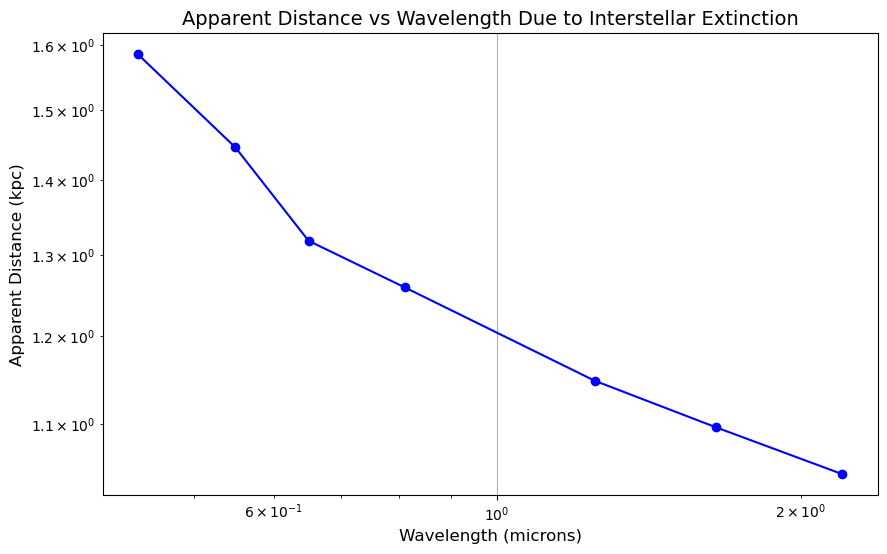

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelengths in microns (B, V, R, I, J, H, K)
wavelengths = np.array([0.44, 0.55, 0.65, 0.81, 1.25, 1.65, 2.2])

# Extinction coefficients (A(lambda)) for each band
# These values are illustrative; replace with actual data from Fouqué et al. (2007)
A_lambda = np.array([1.0, 0.8, 0.6, 0.5, 0.3, 0.2, 0.1])

# True distance in kpc
d_true = 1.0

# Calculate apparent distances
d_apparent = d_true * 10**(0.2 * A_lambda)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, d_apparent, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelength (microns)', fontsize=12)
plt.ylabel('Apparent Distance (kpc)', fontsize=12)
plt.title('Apparent Distance vs Wavelength Due to Interstellar Extinction', fontsize=14)
plt.grid(True)
plt.show()


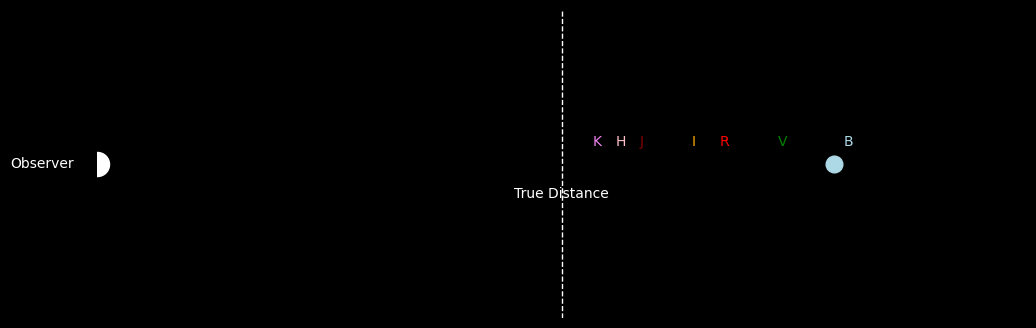

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Bands with colors
bands = ['B', 'V', 'R', 'I', 'J', 'H', 'K']
colors = ['lightblue', 'green', 'red', 'orange', 'darkred', 'pink', 'violet']

# Extinction in magnitudes (illustrative)
A_lambda = np.array([1.0, 0.8, 0.6, 0.5, 0.3, 0.2, 0.1])

# True and apparent distances
d_true = 1.0
d_apparent = d_true * 10**(0.2 * A_lambda)

# Figure setup
fig, ax = plt.subplots(figsize=(12,4))
fig.patch.set_facecolor('black')  # figure background
ax.set_facecolor('black')         # axes background
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.axis('off')

# Draw observer
ax.scatter(0, 0, s=300, color='white', zorder=5)
ax.text(-0.05, 0, 'Observer', color='white', ha='right', va='center')

# True distance line
ax.axvline(d_true, color='white', linestyle='--', lw=1, zorder=1)
ax.text(d_true, -0.15, 'True Distance', color='white', ha='center', va='top')

# Initialize stars
star_markers = {}
for i, band in enumerate(bands):
    star, = ax.plot([], [], 'o', color=colors[i], markersize=12)
    star_markers[band] = star
    # Place band annotation slightly above
    ax.text(d_apparent[i]+0.02, 0.1, f'{band}', color=colors[i],
            ha='left', va='bottom', fontsize=10)

# Animation function: reveal stars one by one
def animate(frame):
    for i in range(frame+1):  # show first (frame+1) bands
        band = bands[i]
        # Pass coordinates as lists to avoid MatplotlibDeprecationWarning
        star_markers[band].set_data([d_apparent[i]], [0])
    return star_markers.values()

# Create animation
anim = FuncAnimation(fig, animate, frames=len(bands), interval=600, repeat=False, blit=True)

# Save as GIF
writer = PillowWriter(fps=2)
#anim.save("star_converging_wavelengths_blackbg.gif", writer=writer)
plt.show()#close(fig)
